# 2009-2010 ASSISTment Skill Builder Data

## Data Description

### Column Description


| Field    | Annotation                                          |
| -------- | --------------------------------------------------- |
| order id | Non-chronological id, refer to original problem log |
| assignment id | Each assignment is specific to single teacher/class. |
| user id | Id of the student |
| problem id | Id of the problem |
| original | Main problem or Scaffolding problem |
| correct | Correct on the fisrt attempt or Incorrect on the first attempt, or asked for help |
| attempt count | Number of attempts of the student |
| ms first reponse | The time in the milliseconds for the student's first response |
| tutor mode | tutor or test |
| answer type | choose_1 or algebra or fill_in or open_response |
| sequence id | Id of the problem set |
| student class id | Class id |
| position | Assignment position on the class assignments page |
| problem set type | Linear or Random or Mastery |
| base sequence id | If the sequence has been copied, this points to the original copy |
| skill id | ID of the skill associated with the problem. In this skill builder dataset, records will be duplicated so that each record with one skill. |
| skill name | Name of the skill |
| teacher id | ID of the teacher |
| school id  | ID of the school  |
| hint count | Number of student attempts |
| hint total | Number of possible hints on the problem |
| overlap time | Time in milliseconds |
| template id | The template ID of the ASSISTment. ASSISTments with the same template ID have similar questions. |
| answer id | The answer ID for multi-choice questions. |
| answer text | The answer text for fill-in questions. |
| first action | The type of first action: attemp or ask for a hint. |
| bottom hint | Whether or not the student asks for all hints. |
| opportunity | The number of opportunities the student has to practice on this skill. |
| opportunity original | The number of opportunities the student has to practice on this skill counting only original problems. |




In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "ASSISTments2009-2010.csv"

data = pd.read_csv(path, encoding = "ISO-8859-15",low_memory=False)

## Record Examples


In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,algebra,5948,13241,126,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,algebra,5948,13241,126,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,3,4,124564,30060,NaN,65,0,0.0,3,3.0


----
## General features

In [4]:
data.describe()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,sequence_id,student_class_id,position,base_sequence_id,skill_id,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,first_action,bottom_hint,opportunity,opportunity_original
count,4.017560e+05,401756.000000,401756.000000,401756.000000,401756.000000,401756.000000,401756.000000,401756.000000,4.017560e+05,401756.000000,401756.000000,401756.000000,401756.000000,338001.000000,401756.000000,401756.000000,401756.000000,401756.000000,4.017560e+05,401756.000000,45454.000000,401756.000000,67044.000000,401756.000000,328291.000000
mean,3.066256e+07,273701.845882,83414.154542,46443.517526,81117.030011,0.817140,0.642923,1.596417,4.748464e+04,7284.411088,12919.115222,57.163649,6786.020985,127.167032,46875.587322,3031.291025,0.487470,2.235817,5.964848e+04,39571.335029,145094.431667,0.130012,0.724092,20.553535,14.403307
std,5.264886e+06,11338.460017,7417.814021,11832.443427,25426.799662,0.386552,0.479139,12.050437,3.614590e+05,1497.941072,783.548291,65.215464,1263.359735,120.427518,15892.975481,1830.451486,1.187255,1.804244,3.822188e+05,12679.439926,47127.478285,0.394099,0.446974,62.523994,62.393684
min,2.022408e+07,217900.000000,14.000000,86.000000,83.000000,0.000000,0.000000,0.000000,-7.759575e+06,5870.000000,11644.000000,1.000000,5870.000000,1.000000,11158.000000,1.000000,0.000000,0.000000,-7.759575e+06,86.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.660218e+07,266784.000000,78970.000000,37046.000000,58467.000000,1.000000,0.000000,1.000000,8.518000e+03,5979.000000,12352.000000,9.000000,5968.000000,39.000000,42999.000000,2770.000000,0.000000,0.000000,1.066900e+04,30244.000000,104412.000000,0.000000,0.000000,3.000000,3.000000
50%,3.110513e+07,271629.000000,80111.000000,44498.000000,80734.000000,1.000000,1.000000,1.000000,1.945300e+04,6910.000000,12574.000000,27.000000,6094.000000,74.000000,45778.000000,2770.000000,0.000000,3.000000,2.426450e+04,30987.000000,136247.000000,0.000000,1.000000,8.000000,6.000000
75%,3.494364e+07,279158.000000,88142.000000,53142.000000,93102.000000,1.000000,1.000000,1.000000,4.457825e+04,8032.000000,13241.000000,92.000000,7014.000000,279.000000,59882.000000,5056.000000,0.000000,4.000000,5.698925e+04,46399.000000,184077.000000,0.000000,1.000000,19.000000,13.000000
max,3.831020e+07,291503.000000,96299.000000,106210.000000,207348.000000,1.000000,1.000000,3824.000000,8.407692e+07,13362.000000,14415.000000,295.000000,13362.000000,378.000000,69274.000000,9948.000000,10.000000,10.000000,8.407692e+07,106180.000000,323181.000000,2.000000,1.000000,3371.000000,3371.000000


In [5]:
print("The number of records: "+ str(len(data['order_id'].unique())))

The number of records: 346860


In [6]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
order_id                0.000000
assignment_id           0.000000
user_id                 0.000000
assistment_id           0.000000
problem_id              0.000000
original                0.000000
correct                 0.000000
attempt_count           0.000000
ms_first_response       0.000000
tutor_mode              0.000000
answer_type             0.000000
sequence_id             0.000000
student_class_id        0.000000
position                0.000000
type                    0.000000
base_sequence_id        0.000000
skill_id                0.158691
skill_name              0.189466
teacher_id              0.000000
school_id               0.000000
hint_count              0.000000
hint_total              0.000000
overlap_time            0.000000
template_id             0.000000
answer_id               0.886862
answer_text             0.222045
first_action            0.000000
bottom_hint             0.833123
opportunity             0.000000
opp

In [7]:
len(data.user_id.unique())

4217

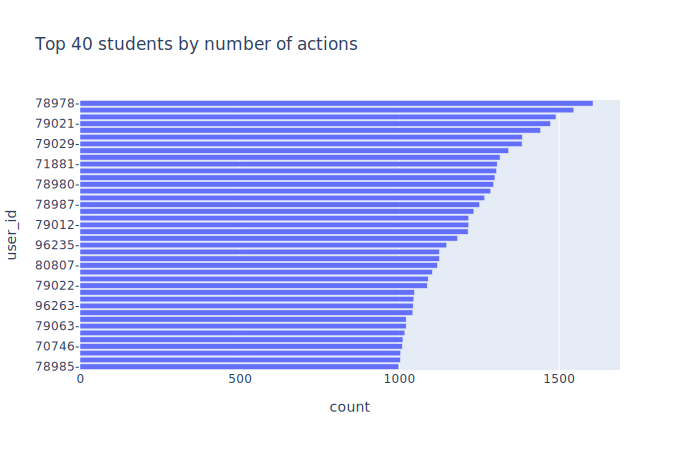

In [8]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds['user_id'] = ds['user_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show("svg")

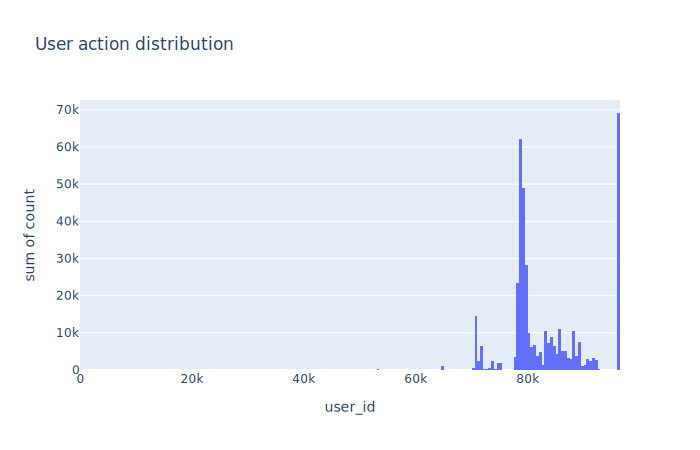

In [9]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds = ds.sort_values('user_id')

fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

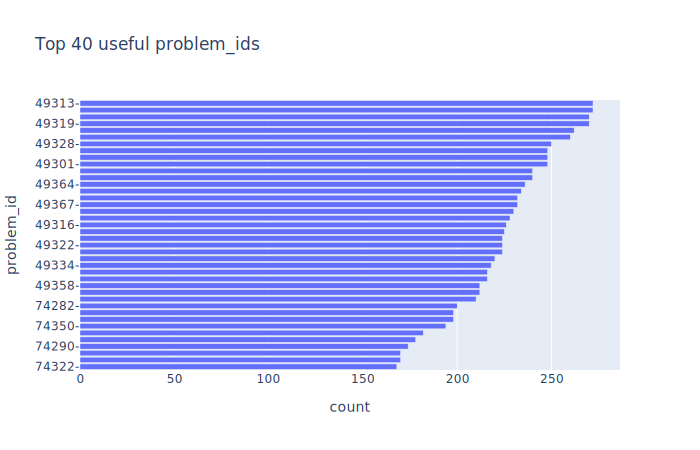

In [10]:
ds = data['problem_id'].value_counts().reset_index()

ds.columns = [
    'problem_id',
    'count'
]

ds['problem_id'] = ds['problem_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'problem_id',
    orientation = 'h',
    title = 'Top 40 useful problem_ids'
)

fig.show("svg")

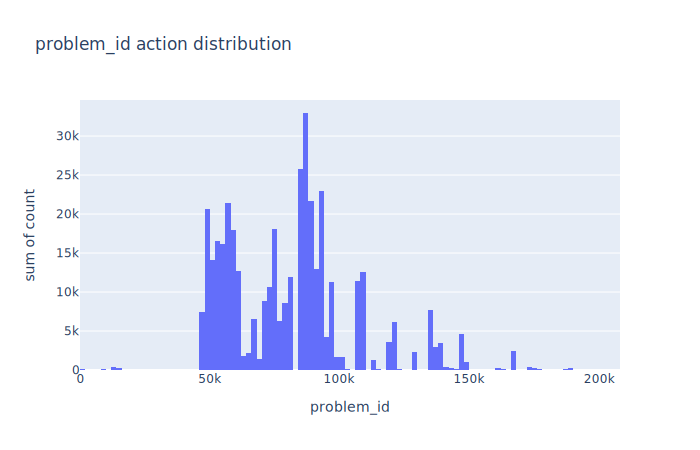

In [11]:
ds = data['problem_id'].value_counts().reset_index()

ds.columns = [
    'problem_id', 
    'count'
]

ds = ds.sort_values('problem_id')

fig = px.histogram(
    ds, 
    x='problem_id', 
    y='count', 
    title='problem_id action distribution'
)

fig.show("svg")

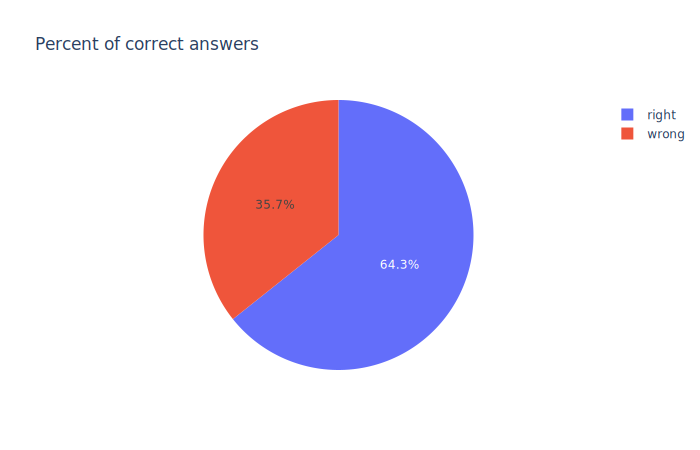

In [12]:
ds = data['correct'].value_counts().reset_index()

ds.columns = [
    'correct',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = ['wrong', 'right'],
    values = 'percent',
    title = 'Percent of correct answers'    
)

fig.show("svg")

****
## Sort by answer types

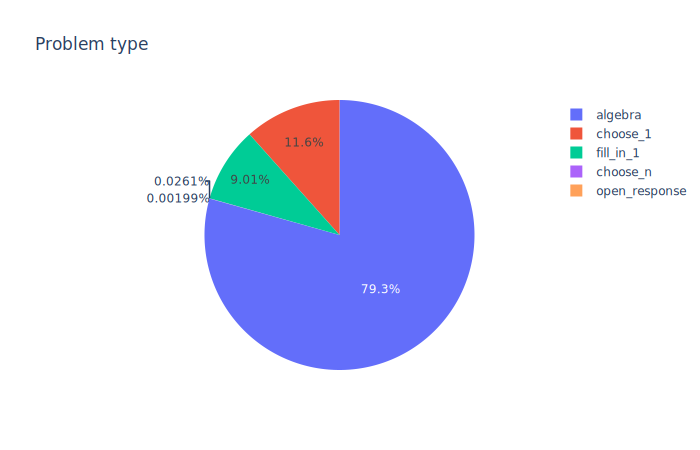

In [13]:
ds = data['answer_type'].value_counts().reset_index()

ds.columns = [
    'answer_type',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'answer_type',
    values = 'percent',
    title = 'Problem type',
)

fig.show("svg")

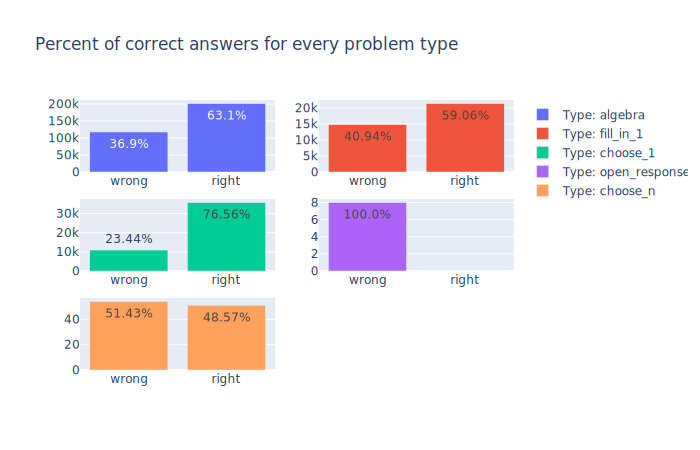

In [14]:
fig = make_subplots(rows=3, cols=2)

traces = [
    go.Bar(
        x = ['wrong', 'right'],
        y = [
            len(data[(data['answer_type'] == item) & (data['correct'] == 0)]),
            len(data[(data['answer_type'] == item) & (data['correct'] == 1)])
        ],
        name = 'Type: ' + str(item),
        text = [
            str(round(100*len(data[(data['answer_type'] == item)&(data['correct'] == 0)])/len(data[data['answer_type'] == item]),2)) + '%',
            str(round(100*len(data[(data['answer_type'] == item)&(data['correct'] == 1)])/len(data[data['answer_type'] == item]),2)) + '%'
        ],
        textposition = 'auto'
    ) for item in data['answer_type'].unique().tolist()
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1,
        (i % 2) + 1
    )
    
fig.update_layout(
    title_text = 'Percent of correct answers for every problem type',
)

fig.show("svg")

****
## Sort by schools

In [15]:
len(data['school_id'].unique())

75

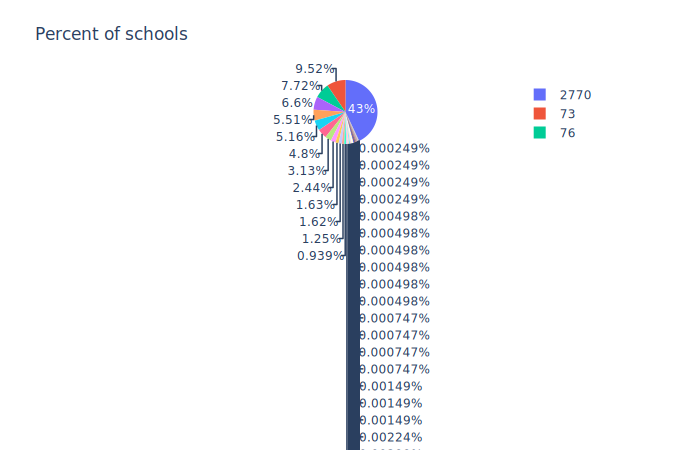

In [16]:
ds = data['school_id'].value_counts().reset_index()

ds.columns = [
    'school_id',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'school_id',
    values = 'percent',
    title = 'Percent of schools',
)

fig.show("svg")

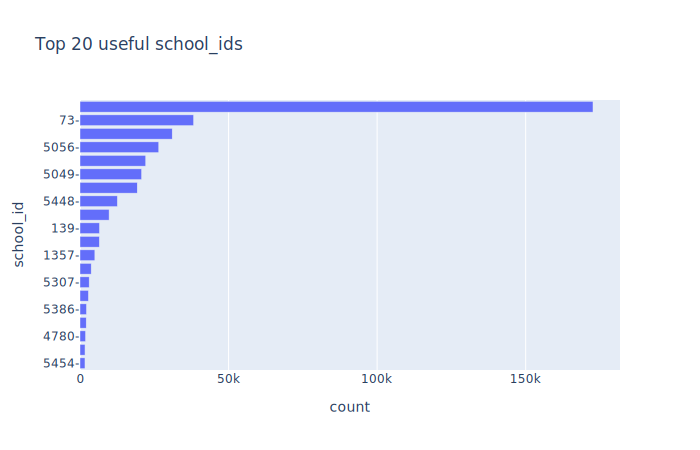

In [17]:
ds = data['school_id'].value_counts().reset_index()

ds.columns = [
    'school_id',
    'count'
]

ds['school_id'] = ds['school_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(20)

fig = px.bar(
    ds,
    x = 'count',
    y = 'school_id',
    orientation = 'h',
    title = 'Top 20 useful school_ids'
)

fig.show("svg")

****
## Sort by attemp counts

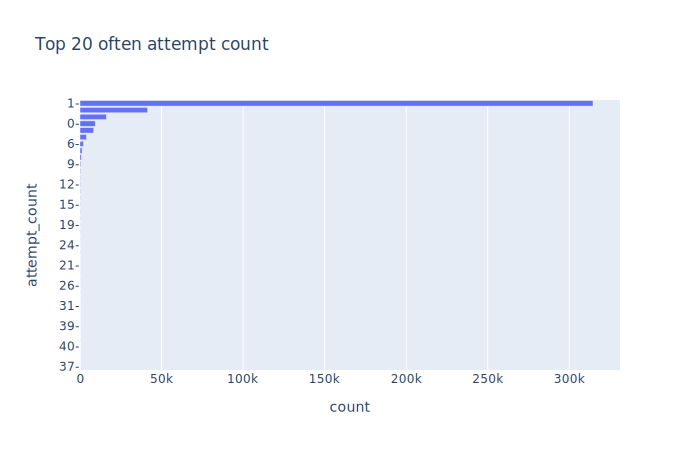

In [18]:
ds = data['attempt_count'].value_counts().reset_index()

ds.columns = [
    'attempt_count',
    'count'
]

ds['attempt_count'] = ds['attempt_count'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'attempt_count',
    orientation = 'h',
    title = 'Top 20 often attempt count'
)

fig.show("svg")

*******
## Sort by skills

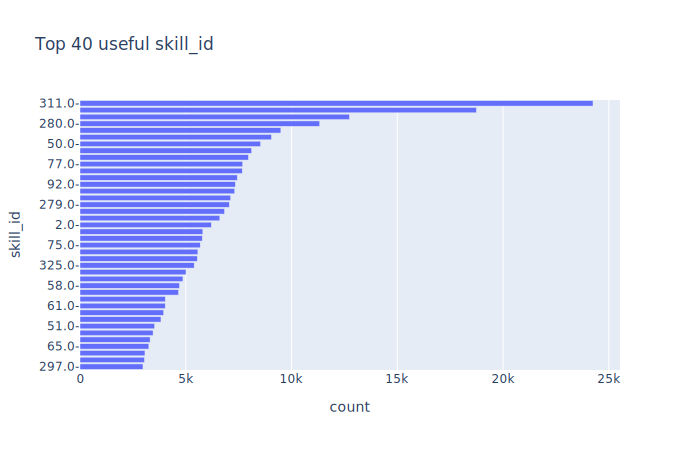

In [19]:
ds = data['skill_id'].dropna() # There are less NaNs in 'skill_id' column than 'skill_name' column.
ds = ds.value_counts().reset_index()

ds.columns = [
    'skill_id',
    'count'
]

ds['skill_id'] = ds['skill_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'skill_id',
    orientation = 'h',
    title = 'Top 40 useful skill_id'
)

fig.show("svg")